<a href="https://colab.research.google.com/github/rgautham3110/pneumonia-classification/blob/master/Pnemonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.2.0-rc2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Datasets/chest-xray-pneumonia.zip"

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [ ]:
DATA_DIR = '/content/chest_xray/train'
categories = []
for (dirpath, dirnames, filenames) in os.walk(DATA_DIR):
    categories.extend(dirnames)
    break
print(len(categories))

2


100%|██████████| 2/2 [00:47<00:00, 23.96s/it]

 Total number of images: 5216


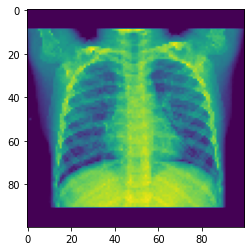

In [ ]:
data = []
IMG_SIZE = 100

for category in tqdm(categories):
  path = os.path.join(DATA_DIR, category)
  class_num = np.zeros(len(categories))
  class_num[categories.index(category)] = 1
  
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

      s = np.shape(img_array)
      m = max(s)
      top = bottom = int((m-s[0])/2)
      left = right = int((m-s[1])/2)
      padded_img_array = cv2.copyMakeBorder( img_array, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

      new_array = cv2.resize(padded_img_array, (IMG_SIZE, IMG_SIZE))

      if(len(data) == 0):
        plt.imshow(new_array)

      data.append([new_array, class_num])
    except Exception as e:
      pass
print(' Total number of images: ' + str(len(data)))

In [ ]:
import random
random.shuffle(data)

(5216, 100, 100, 1)
(5216, 2)
[0. 1.]


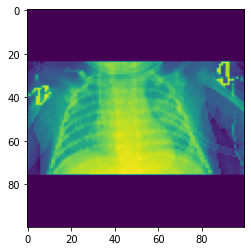

In [ ]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

print(np.shape(X))
print(np.shape(y))

plt.imshow(X[2].reshape(IMG_SIZE, IMG_SIZE))
print(y[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

X = X/255.0
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle= True)
X_train, X_valid, y_train, y_valid = tf.data.Data
model = Sequential()

model.add(Conv2D(256, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(256, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(256, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(256, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(len(categories)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=64, epochs=10)
model.evaluate(X, y, batch_size=64)

Epoch 1/10
82/82 [==============================] - 6s 76ms/step - loss: 0.4160 - accuracy: 0.8211
Epoch 2/10
82/82 [==============================] - 6s 72ms/step - loss: 0.1801 - accuracy: 0.9302
Epoch 3/10
82/82 [==============================] - 6s 71ms/step - loss: 0.1320 - accuracy: 0.9490
Epoch 4/10
82/82 [==============================] - 6s 70ms/step - loss: 0.1259 - accuracy: 0.9523
Epoch 5/10
82/82 [==============================] - 6s 71ms/step - loss: 0.1153 - accuracy: 0.9561
Epoch 6/10
82/82 [==============================] - 6s 71ms/step - loss: 0.0751 - accuracy: 0.9707
Epoch 7/10
82/82 [==============================] - 6s 71ms/step - loss: 0.0716 - accuracy: 0.9726
Epoch 8/10
82/82 [==============================] - 6s 71ms/step - loss: 0.0687 - accuracy: 0.9749
Epoch 9/10
82/82 [==============================] - 6s 71ms/step - loss: 0.0634 - accuracy: 0.9783
Epoch 10/10
82/82 [==============================] - 2s 25ms/step - loss: 0.0275 - accuracy: 0.9900


[0.02748061716556549, 0.9900306463241577]

PNEUMONIA


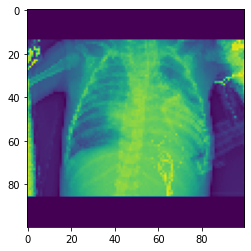

In [ ]:
index = 4
img = X_valid[index].reshape(IMG_SIZE, IMG_SIZE) * 255.0
cv2.imwrite('color_img.jpg', img)
plt.imshow(img)

predict = model.predict(X_valid[index].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
p = list(predict[0])
i = p.index(max(p))
print(categories[i])

NORMAL


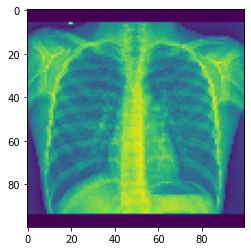

In [ ]:
path = '/content/chest_xray/test/NORMAL/IM-0007-0001.jpeg'

sample_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
s = np.shape(sample_image)
m = max(s)
top = bottom = int((m-s[0])/2)
left = right = int((m-s[1])/2)
padded_img_array = cv2.copyMakeBorder( sample_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
new_array = cv2.resize(padded_img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)

ip = np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

predict = model.predict(ip)
p = list(predict[0])
i = p.index(max(p))
print(categories[i])